## EWC Visualization

In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [2]:
num_task=10
epochs=20

def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

def get_mean_acc_on_iterations(acc_list):
    acc = {}
    for i in acc_list[0].keys():
        acc[i] = np.zeros(len(acc_list[0][i]))
    for t in range(len(acc_list)):
        for i in acc_list[0].keys():
            acc[i] += np.array(acc_list[t][i]) / len(acc_list)
    return acc

In [3]:
acc_ewc_list = [[] for i in range(8)]
acc_sketch_ewc_10_list = [[] for i in range(5)]
acc_sketch_ewc_50_list = [[] for i in range(5)]
for i in range(5):
    path_EWC = '.\\perm_mnist_10Run\\experiment_EWC_id_%d.pkl'%(i)
    path_SketchEWC_10 = '.\\perm_mnist_5Run\\experiment_SketchEWC_id_%d_bucket_10.pkl'%(i)
    path_SketchEWC_50 = '.\\perm_mnist_5Run\\experiment_SketchEWC_id_%d.pkl'%(i)
    with open(path_EWC, 'rb') as f:
        _, acc_ewc, hyperparameter_ewc = pickle.load(f)
        for j in range(8):
            acc_ewc_list[j].append(acc_ewc[j])
    with open(path_SketchEWC_10, 'rb') as f:
        _, acc_sketch_ewc_10, hyperparameter_sketch_ewc_10 = pickle.load(f)
        for j in range(5):
            acc_sketch_ewc_10_list[j].append(acc_sketch_ewc_10[j])
    with open(path_SketchEWC_50, 'rb') as f:
        _, acc_sketch_ewc_50, hyperparameter_sketch_ewc_50 = pickle.load(f)
        for j in range(5):
            acc_sketch_ewc_50_list[j].append(acc_sketch_ewc_50[j])

In [4]:
acc_sketch_ewc_buckets_list = [[] for i in range(5)]
for i in range(5):
    path_SketchEWC_buckets = '.\\perm_mnist_5Run\\experiment_SketchEWC_id_%d_bucket_10-50.pkl'%(i)
    with open(path_SketchEWC_buckets, 'rb') as f:
        _, acc_sketch_ewc_buckets, hyperparameter_sketch_ewc_buckets = pickle.load(f)
        for j in range(5):
            acc_sketch_ewc_buckets_list[j].append(acc_sketch_ewc_buckets[j])

In [5]:
acc_ewc_final = np.array([get_mean_acc(acc_ewc_list[3][i],epochs)[-1] for i in range(5)])
acc_sketch_ewc_final = np.array([get_mean_acc(acc_sketch_ewc_50_list[2][i],epochs)[-1] for i in range(5)])
print(acc_ewc_final.mean(), acc_ewc_final.std())
print(acc_sketch_ewc_final.mean(), acc_sketch_ewc_final.std())

0.882744 0.007561752706879592
0.898542 0.00831099368306834


In [6]:
from scipy import stats
stats.ttest_rel(acc_ewc_final,acc_sketch_ewc_final,alternative='less')

Ttest_relResult(statistic=-3.4237552629306633, pvalue=0.013344017123824096)

In [7]:
acc_ewc_all = np.array([[get_mean_acc(acc_ewc_list[3][i],epochs)[j] for i in range(5)] for j in range(num_task*epochs)])
acc_sketch_ewc_all = np.array([[get_mean_acc(acc_sketch_ewc_50_list[2][i],epochs)[j] for i in range(5)] for j in range(num_task*epochs)])

acc_ewc_std = acc_ewc_all.std(axis=1)
acc_sketch_ewc_std = acc_sketch_ewc_all.std(axis=1)
print(acc_ewc_std[-1])
print(acc_sketch_ewc_std[-1])

0.007561752706879592
0.00831099368306834


In [10]:
acc_sketch_ewc_bucket_final_list = np.array([[get_mean_acc(acc_sketch_ewc_buckets_list[j][i],epochs)[-1] for i in range(5)] for j in range(5)])
for j in range(5):
    print(acc_sketch_ewc_bucket_final_list[j].mean(), acc_sketch_ewc_bucket_final_list[j].std())

0.80586 0.05445450100772208
0.8744479999999999 0.014618108495971673
0.8889859999999998 0.006000018666637618
0.885196 0.023624265999179668
0.898542 0.00831099368306834


In [12]:
for j in range(8):
    acc_ewc_list[j] = get_mean_acc_on_iterations(acc_ewc_list[j])
for j in range(5):
    acc_sketch_ewc_10_list[j] = get_mean_acc_on_iterations(acc_sketch_ewc_10_list[j])
for j in range(5):
    acc_sketch_ewc_50_list[j] = get_mean_acc_on_iterations(acc_sketch_ewc_50_list[j])

In [13]:
for j in range(5):
    acc_sketch_ewc_buckets_list[j] = get_mean_acc_on_iterations(acc_sketch_ewc_buckets_list[j])

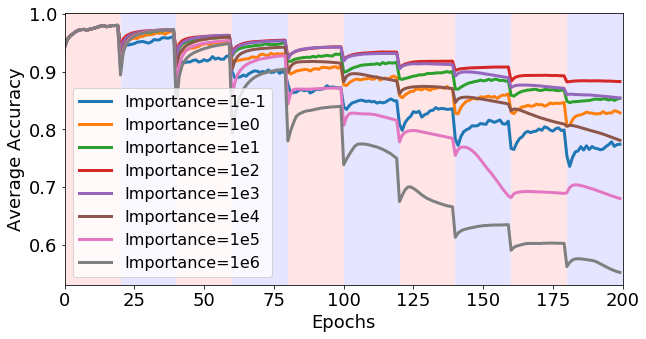

In [14]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(8):
    plt.plot(get_mean_acc(acc_ewc_list[i],epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Importance=1e-1', 'Importance=1e0', 'Importance=1e1', 'Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_ewc.pdf', bbox_inches='tight')
plt.show()

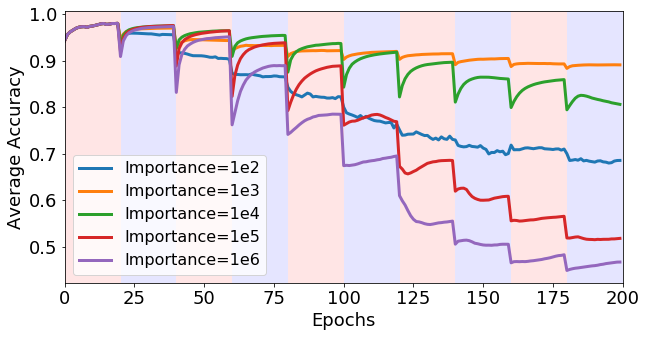

In [15]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_ewc_10_list[i],epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_sketch_ewc_10_sketches.pdf', bbox_inches='tight')
plt.show()

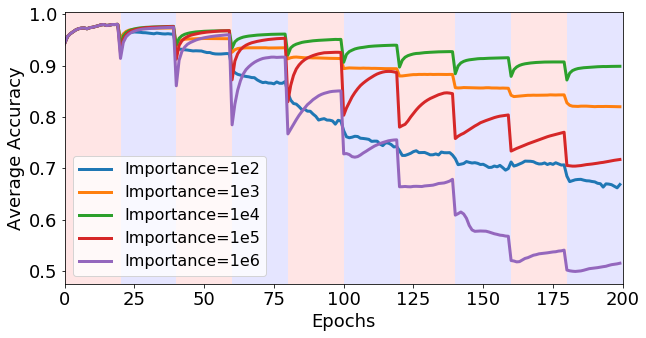

In [16]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_ewc_50_list[i],epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['1e2', '1e3', '1e4', '1e5', '1e6'],fontsize=18)
plt.legend(['Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_sketch_ewc_50_sketches.pdf', bbox_inches='tight')
plt.show()

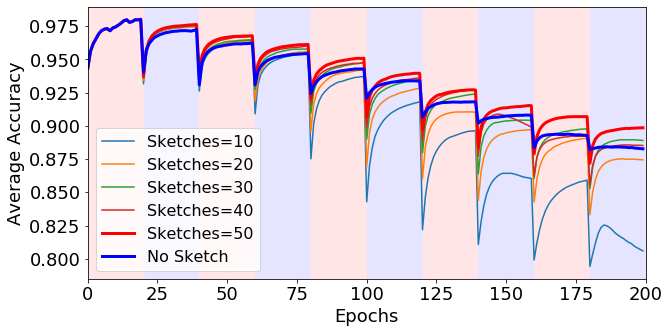

In [17]:
acc_ewc = acc_ewc_list[3]
acc_sketch_ewc = acc_sketch_ewc_50_list[2]

plt.figure(figsize=(10,5))

for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
    
for i in range(4):
    plt.plot(get_mean_acc(acc_sketch_ewc_buckets_list[i],epochs),linewidth=1.5)
plt.plot(get_mean_acc(acc_sketch_ewc_buckets_list[4],epochs),'r',linewidth=3)
plt.plot(get_mean_acc(acc_ewc,epochs),'b',linewidth=3)

plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Sketches=10', 'Sketches=20', 'Sketches=30', 'Sketches=40', 'Sketches=50', 'No Sketch'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_ewc_sketches_search.pdf', bbox_inches='tight')
plt.show()


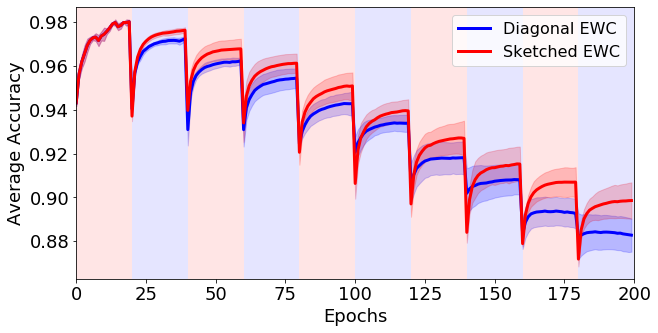

In [18]:
plt.figure(figsize=(10,5))

for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_ewc,epochs),'b',linewidth=3)
plt.fill_between(np.arange(0,num_task*epochs),
                 get_mean_acc(acc_ewc,epochs)-acc_ewc_std,
                 get_mean_acc(acc_ewc,epochs)+acc_ewc_std,
                 color='b',alpha=.2)
plt.plot(get_mean_acc(acc_sketch_ewc,epochs),'r',linewidth=3)
plt.fill_between(np.arange(0,num_task*epochs),
                 get_mean_acc(acc_sketch_ewc,epochs)-acc_sketch_ewc_std,
                 get_mean_acc(acc_sketch_ewc,epochs)+acc_sketch_ewc_std,
                 color='r',alpha=.2)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Diagonal EWC', 'Sketched EWC'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)

# plt.savefig('figure/grid_search_sketch_ewc_compare.pdf', bbox_inches='tight')
plt.show()

In [19]:
print(get_mean_acc(acc_ewc,epochs)[-1],
      get_mean_acc(acc_sketch_ewc,epochs)[-1])

0.8827440000000001 0.898542


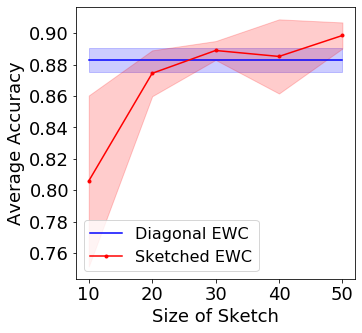

In [32]:
plt.figure(figsize=(5,5))

plt.plot([10,50], [get_mean_acc(acc_ewc,epochs)[-1] for i in range(2)], 'b-')
plt.plot([10,20,30,40,50], [get_mean_acc(acc_sketch_ewc_buckets_list[i],epochs)[-1] for i in range(5)], 'r.-')

plt.fill_between([10,50],
                 [get_mean_acc(acc_ewc,epochs)[-1] - acc_ewc_std[-1] for i in range(2)],
                 [get_mean_acc(acc_ewc,epochs)[-1] + acc_ewc_std[-1] for i in range(2)],
                 color='b',alpha=.2)
plt.fill_between([10,20,30,40,50],
                 [get_mean_acc(acc_sketch_ewc_buckets_list[i], epochs)[-1] - acc_sketch_ewc_bucket_final_list[i].std() for i in range(5)],
                 [get_mean_acc(acc_sketch_ewc_buckets_list[i], epochs)[-1] + acc_sketch_ewc_bucket_final_list[i].std() for i in range(5)],
                 color='r',alpha=.2)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.legend(['Diagonal EWC', 'Sketched EWC'],fontsize=16)
plt.xlabel('Size of Sketch',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
# plt.ylim(0.80,0.91)

plt.savefig('figure/grid_search_sketch_ewc_sketches_search_2.pdf', bbox_inches='tight')
plt.show()

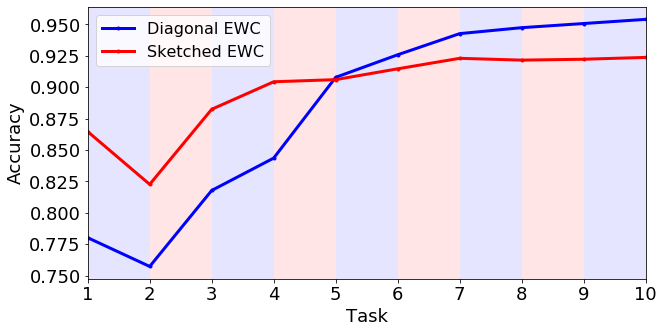

In [33]:
plt.figure(figsize=(10,5))

for t in range(1,num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t, t+1, facecolor=c, alpha=0.1)
plt.plot(np.arange(10)+1,[acc_ewc[j][-1] for j in range(10)],'b.-',linewidth=3)
plt.plot(np.arange(10)+1,[acc_sketch_ewc[j][-1] for j in range(10)],'r.-',linewidth=3)
plt.xlim(1,num_task)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=10)
plt.legend(['Diagonal EWC','Sketched EWC'],fontsize=16)
plt.xlabel('Task',fontsize=18),plt.ylabel('Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_ewc_task_compare_1.pdf', bbox_inches='tight')
plt.show()

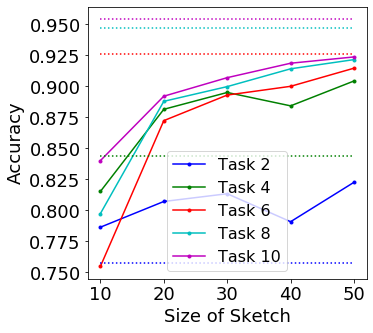

In [34]:
plt.figure(figsize=(5,5))

plt.plot([10,20,30,40,50],[acc_sketch_ewc_buckets_list[i][1][-1] for i in range(5)],'b.-')
plt.plot([10,20,30,40,50],[acc_sketch_ewc_buckets_list[i][3][-1] for i in range(5)],'g.-')
plt.plot([10,20,30,40,50],[acc_sketch_ewc_buckets_list[i][5][-1] for i in range(5)],'r.-')
plt.plot([10,20,30,40,50],[acc_sketch_ewc_buckets_list[i][7][-1] for i in range(5)],'c.-')
plt.plot([10,20,30,40,50],[acc_sketch_ewc_buckets_list[i][9][-1] for i in range(5)],'m.-')
plt.plot([10,50], [acc_ewc[1][-1]for i in range(2)], 'b:', label=None)
plt.plot([10,50], [acc_ewc[3][-1]for i in range(2)], 'g:', label=None)
plt.plot([10,50], [acc_ewc[5][-1]for i in range(2)], 'r:', label=None)
plt.plot([10,50], [acc_ewc[7][-1]for i in range(2)], 'c:', label=None)
plt.plot([10,50], [acc_ewc[9][-1]for i in range(2)], 'm:', label=None)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=5)
plt.legend(['Task 2','Task 4','Task 6','Task 8','Task 10'],fontsize=16)
plt.xlabel('Size of Sketch',fontsize=18),plt.ylabel('Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_ewc_task_compare_2.pdf', bbox_inches='tight')
plt.show()

## MAS Visualization

In [35]:
acc_mas_list = [[] for i in range(8)]
acc_sketch_mas_list = [[] for i in range(5)]
for i in range(5):
    path_MAS = '.\\perm_mnist_10Run\\experiment_MAS_id_%d.pkl'%(i)
    path_SketchMAS = '.\\perm_mnist_5Run\\experiment_SketchMAS_id_%d.pkl'%(i)
    with open(path_MAS, 'rb') as f:
        _, acc_mas, hyperparameter_mas = pickle.load(f)
        for j in range(8):
            acc_mas_list[j].append(acc_mas[j])
    with open(path_SketchMAS, 'rb') as f:
        _, acc_sketch_mas, hyperparameter_sketch_mas = pickle.load(f)
        for j in range(5):
            acc_sketch_mas_list[j].append(acc_sketch_mas[j])

In [36]:
acc_sketch_mas_buckets_list = [[] for i in range(5)]
for i in range(5):
    path_SketchMAS_buckets = '.\\perm_mnist_5Run\\experiment_SketchMAS_id_%d_bucket_10-50.pkl'%(i)
    with open(path_SketchMAS_buckets, 'rb') as f:
        _, acc_sketch_mas_buckets, hyperparameter_sketch_mas_buckets = pickle.load(f)
        for j in range(5):
            acc_sketch_mas_buckets_list[j].append(acc_sketch_mas_buckets[j])

In [37]:
acc_mas_all = np.array([[get_mean_acc(acc_mas_list[4][i],epochs)[j] for i in range(5)] for j in range(num_task*epochs)])
acc_sketch_mas_all = np.array([[get_mean_acc(acc_sketch_mas_list[2][i],epochs)[j] for i in range(5)] for j in range(num_task*epochs)])

acc_mas_std = acc_mas_all.std(axis=1)
acc_sketch_mas_std = acc_sketch_mas_all.std(axis=1)
print(acc_mas_std[-1])
print(acc_sketch_mas_std[-1])

0.011650901081032285
0.007415053337636889


In [39]:
acc_sketch_mas_bucket_final_list = np.array([[get_mean_acc(acc_sketch_mas_buckets_list[j][i],epochs)[-1] for i in range(5)] for j in range(5)])
for j in range(5):
    print(acc_sketch_mas_bucket_final_list[j].mean(), acc_sketch_mas_bucket_final_list[j].std())

0.895402 0.012396227490652136
0.9006160000000001 0.008950578975686435
0.8981960000000001 0.01087220235278936
0.901976 0.010000881161177786
0.904382 0.007415053337636889


In [38]:
for j in range(8):
    acc_mas_list[j] = get_mean_acc_on_iterations(acc_mas_list[j])
for j in range(5):
    acc_sketch_mas_list[j] = get_mean_acc_on_iterations(acc_sketch_mas_list[j])

In [40]:
for j in range(5):
    acc_sketch_mas_buckets_list[j] = get_mean_acc_on_iterations(acc_sketch_mas_buckets_list[j])

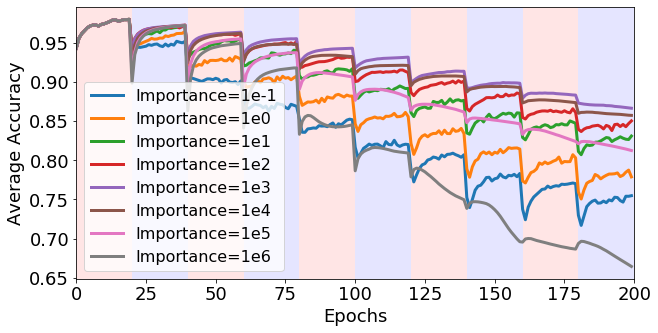

In [41]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(8):
    plt.plot(get_mean_acc(acc_mas_list[i],epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Importance=1e-1', 'Importance=1e0', 'Importance=1e1', 'Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_mas.pdf', bbox_inches='tight')
plt.show()

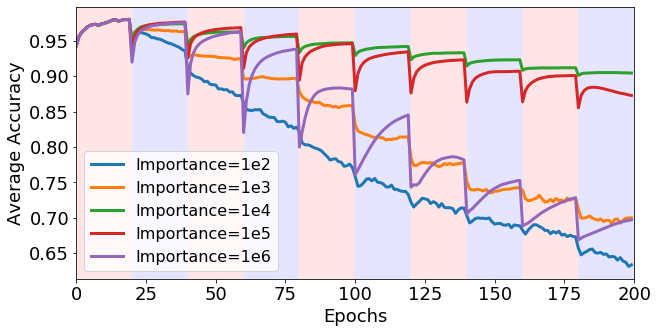

In [42]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_mas_list[i],epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_sketch_mas_50_sketches.pdf', bbox_inches='tight')
plt.show()

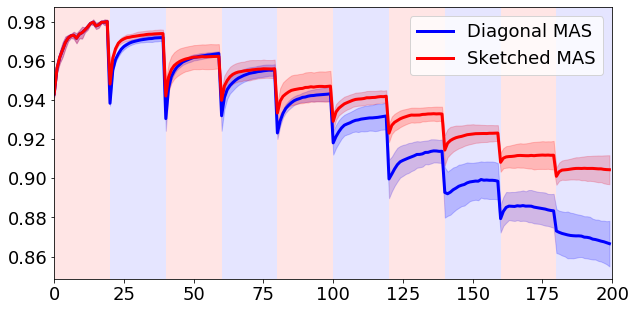

In [43]:
acc_mas = acc_mas_list[4]
acc_sketch_mas = acc_sketch_mas_list[2]

plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_mas,epochs),'b',linewidth=3)
plt.fill_between(np.arange(0,num_task*epochs),
                 get_mean_acc(acc_mas,epochs)-acc_mas_std,
                 get_mean_acc(acc_mas,epochs)+acc_mas_std,
                 color='b',alpha=.2)
plt.plot(get_mean_acc(acc_sketch_mas,epochs),'r',linewidth=3)
plt.fill_between(np.arange(0,num_task*epochs),
                 get_mean_acc(acc_sketch_mas,epochs)-acc_sketch_mas_std,
                 get_mean_acc(acc_sketch_mas,epochs)+acc_sketch_mas_std,
                 color='r',alpha=.2)

plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Diagonal MAS','Sketched MAS'],fontsize=18)
plt.savefig('figure/grid_search_sketch_mas_compare.pdf', bbox_inches='tight')
plt.show()


In [44]:
print(get_mean_acc(acc_mas,epochs)[-1],
      get_mean_acc(acc_sketch_mas,epochs)[-1])

0.866578 0.904382


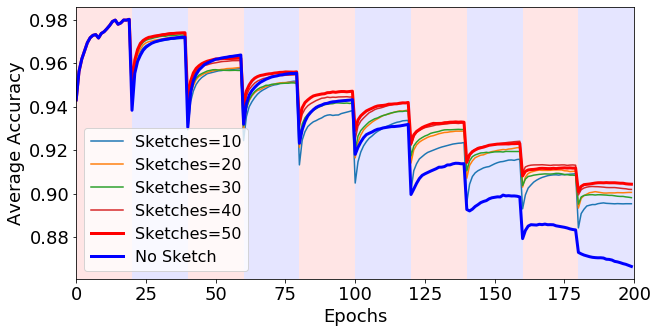

In [45]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
    
for i in range(4):
    plt.plot(get_mean_acc(acc_sketch_mas_buckets_list[i],epochs),linewidth=1.5)
plt.plot(get_mean_acc(acc_sketch_mas_buckets_list[4],epochs),'r',linewidth=3)
plt.plot(get_mean_acc(acc_mas,epochs),'b',linewidth=3)

plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Sketches=10', 'Sketches=20', 'Sketches=30', 'Sketches=40', 'Sketches=50', 'No Sketch'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_mas_sketches_search.pdf', bbox_inches='tight')
plt.show()

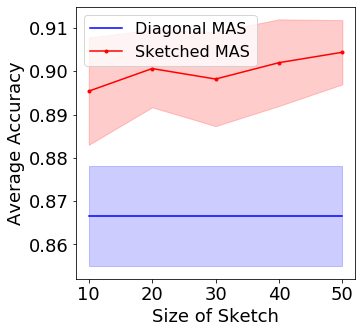

In [46]:
plt.figure(figsize=(5,5))

plt.plot([10,50], [get_mean_acc(acc_mas,epochs)[-1] for i in range(2)], 'b-')
plt.plot([10,20,30,40,50], [get_mean_acc(acc_sketch_mas_buckets_list[i],epochs)[-1] for i in range(5)], 'r.-')
plt.fill_between([10,50],
                 [get_mean_acc(acc_mas,epochs)[-1] - acc_mas_std[-1] for i in range(2)],
                 [get_mean_acc(acc_mas,epochs)[-1] + acc_mas_std[-1] for i in range(2)],
                 color='b',alpha=.2)
plt.fill_between([10,20,30,40,50],
                 [get_mean_acc(acc_sketch_mas_buckets_list[i], epochs)[-1] - acc_sketch_mas_bucket_final_list[i].std() for i in range(5)],
                 [get_mean_acc(acc_sketch_mas_buckets_list[i], epochs)[-1] + acc_sketch_mas_bucket_final_list[i].std() for i in range(5)],
                 color='r',alpha=.2)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.legend(['Diagonal MAS', 'Sketched MAS'],fontsize=16)
plt.xlabel('Size of Sketch',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
# plt.ylim(0.80,0.91)

plt.savefig('figure/grid_search_sketch_mas_sketches_search_2.pdf', bbox_inches='tight')
plt.show()

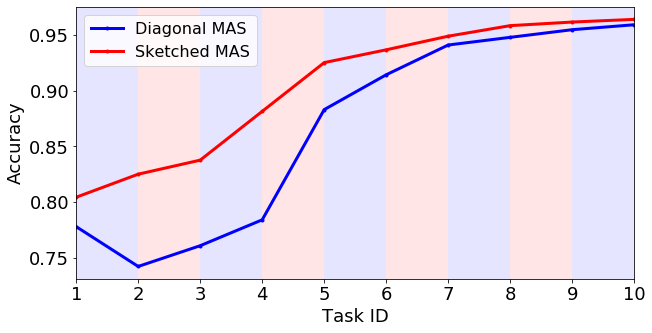

In [47]:
plt.figure(figsize=(10,5))
for t in range(1,num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t, t+1, facecolor=c, alpha=0.1)

plt.plot(np.arange(10)+1,[acc_mas[j][-1] for j in range(10)],'b.-',linewidth=3)
plt.plot(np.arange(10)+1,[acc_sketch_mas[j][-1] for j in range(10)],'r.-',linewidth=3)
plt.xlim(1,num_task)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=10)
plt.legend(['Diagonal MAS','Sketched MAS'],fontsize=16)
plt.xlabel('Task ID',fontsize=18),plt.ylabel('Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_mas_task_compare_1.pdf', bbox_inches='tight')
plt.show()

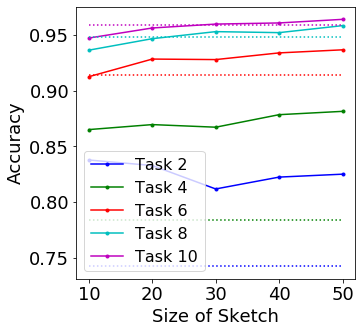

In [48]:
plt.figure(figsize=(5,5))

plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][1][-1] for i in range(5)],'b.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][3][-1] for i in range(5)],'g.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][5][-1] for i in range(5)],'r.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][7][-1] for i in range(5)],'c.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][9][-1] for i in range(5)],'m.-')
plt.plot([10,50], [acc_mas[1][-1]for i in range(2)], 'b:', label=None)
plt.plot([10,50], [acc_mas[3][-1]for i in range(2)], 'g:', label=None)
plt.plot([10,50], [acc_mas[5][-1]for i in range(2)], 'r:', label=None)
plt.plot([10,50], [acc_mas[7][-1]for i in range(2)], 'c:', label=None)
plt.plot([10,50], [acc_mas[9][-1]for i in range(2)], 'm:', label=None)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=5)
plt.legend(['Task 2','Task 4','Task 6','Task 8','Task 10'],fontsize=16, loc='lower left')
plt.xlabel('Size of Sketch',fontsize=18),plt.ylabel('Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_mas_task_compare_2.pdf', bbox_inches='tight')
plt.show()

## Combined Visualization

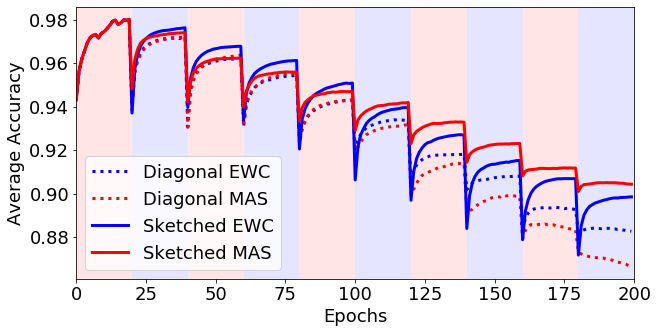

In [49]:
plt.figure(figsize=(10,5))

for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_ewc,epochs),'b:',linewidth=3)
# plt.fill_between(np.arange(0,num_task*epochs),
#                  get_mean_acc(acc_ewc,epochs)-acc_ewc_std,
#                  get_mean_acc(acc_ewc,epochs)+acc_ewc_std,
#                  color='b',alpha=.2)
plt.plot(get_mean_acc(acc_mas,epochs),'r:',linewidth=3)
# plt.fill_between(np.arange(0,num_task*epochs),
#                  get_mean_acc(acc_mas,epochs)-acc_mas_std,
#                  get_mean_acc(acc_mas,epochs)+acc_mas_std,
#                  color='r',alpha=.2)
plt.plot(get_mean_acc(acc_sketch_ewc,epochs),'b',linewidth=3)
# plt.fill_between(np.arange(0,num_task*epochs),
#                  get_mean_acc(acc_sketch_ewc,epochs)-acc_sketch_ewc_std,
#                  get_mean_acc(acc_sketch_ewc,epochs)+acc_sketch_ewc_std,
#                  color='b',alpha=.2)
plt.plot(get_mean_acc(acc_sketch_mas,epochs),'r',linewidth=3)
# plt.fill_between(np.arange(0,num_task*epochs),
#                  get_mean_acc(acc_sketch_mas,epochs)-acc_sketch_mas_std,
#                  get_mean_acc(acc_sketch_mas,epochs)+acc_sketch_mas_std,
#                  color='r',alpha=.2)

plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.legend(['Diagonal EWC','Diagonal MAS','Sketched EWC','Sketched MAS'],fontsize=18)
plt.savefig('figure/grid_search_compare.pdf', bbox_inches='tight')
plt.show()

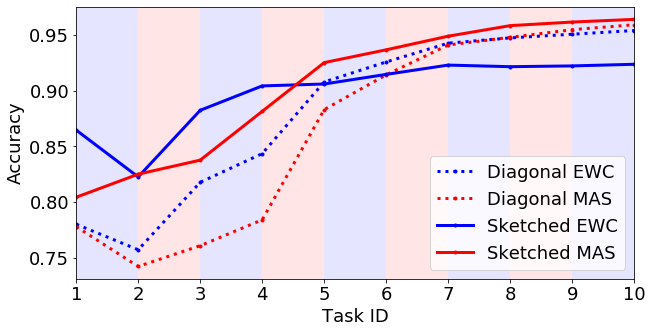

In [50]:
plt.figure(figsize=(10,5))

for t in range(1,num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t, t+1, facecolor=c, alpha=0.1)

plt.plot(np.arange(10)+1,[acc_ewc[j][-1] for j in range(10)],'b.:',linewidth=3)
plt.plot(np.arange(10)+1,[acc_mas[j][-1] for j in range(10)],'r.:' ,linewidth=3)
plt.plot(np.arange(10)+1,[acc_sketch_ewc[j][-1] for j in range(10)],'b.-',linewidth=3)
plt.plot(np.arange(10)+1,[acc_sketch_mas[j][-1] for j in range(10)],'r.-',linewidth=3)
plt.xlim(1,num_task)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=10)
plt.legend(['Diagonal EWC','Diagonal MAS','Sketched EWC','Sketched MAS'],fontsize=18)
plt.xlabel('Task ID',fontsize=18),plt.ylabel('Accuracy',fontsize=18)
plt.savefig('figure/grid_search_task_compare_1.pdf', bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x0000017479F0DC08> has a label of '_' which cannot be automatically added to the legend.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x0000017479F04AC8> has a label of '_' which cannot be automatically added to the legend.


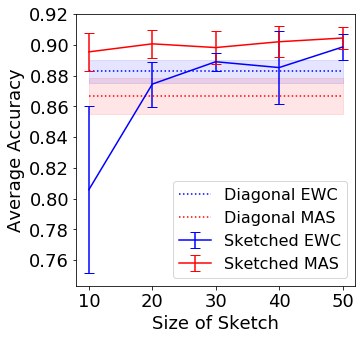

In [75]:
plt.figure(figsize=(5,5))

plt.plot([10,50], [get_mean_acc(acc_ewc,epochs)[-1] for i in range(2)], 'b:')
plt.fill_between([10,50],
                 [get_mean_acc(acc_ewc,epochs)[-1] - acc_ewc_std[-1] for i in range(2)],
                 [get_mean_acc(acc_ewc,epochs)[-1] + acc_ewc_std[-1] for i in range(2)],
                 color='b',alpha=.1)
plt.plot([10,50], [get_mean_acc(acc_mas,epochs)[-1] for i in range(2)], 'r:')
plt.fill_between([10,50],
                 [get_mean_acc(acc_mas,epochs)[-1] - acc_mas_std[-1] for i in range(2)],
                 [get_mean_acc(acc_mas,epochs)[-1] + acc_mas_std[-1] for i in range(2)],
                 color='r',alpha=.1)

# plt.plot([10,20,30,40,50], [get_mean_acc(acc_sketch_ewc_buckets_list[i],epochs)[-1] for i in range(5)], 'b.-')
# plt.fill_between([10,20,30,40,50],
#                  [get_mean_acc(acc_sketch_ewc_buckets_list[i], epochs)[-1] - acc_sketch_ewc_bucket_final_list[i].std() for i in range(5)],
#                  [get_mean_acc(acc_sketch_ewc_buckets_list[i], epochs)[-1] + acc_sketch_ewc_bucket_final_list[i].std() for i in range(5)],
#                  color='b',alpha=.2)
plt.errorbar([10,20,30,40,50], 
             [get_mean_acc(acc_sketch_ewc_buckets_list[i],epochs)[-1] for i in range(5)],
             yerr=[acc_sketch_ewc_bucket_final_list[j].std() for j in range(5)],
             color='b', capsize=5)
# plt.plot([10,20,30,40,50], [get_mean_acc(acc_sketch_mas_buckets_list[i],epochs)[-1] for i in range(5)], 'r.-')
# plt.fill_between([10,20,30,40,50],
#                  [get_mean_acc(acc_sketch_mas_buckets_list[i], epochs)[-1] - acc_sketch_mas_bucket_final_list[i].std() for i in range(5)],
#                  [get_mean_acc(acc_sketch_mas_buckets_list[i], epochs)[-1] + acc_sketch_mas_bucket_final_list[i].std() for i in range(5)],
#                  color='r',alpha=.2)
plt.errorbar([10,20,30,40,50], 
             [get_mean_acc(acc_sketch_mas_buckets_list[i],epochs)[-1] for i in range(5)],
             yerr=[acc_sketch_mas_bucket_final_list[j].std() for j in range(5)],
             color='r', capsize=5)

plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.legend(['Diagonal EWC','Diagonal MAS','_','_','Sketched EWC','Sketched MAS'],fontsize=16)
plt.xlabel('Size of Sketch',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
# plt.ylim(0.80,0.91)

plt.savefig('figure/grid_search_sketches.pdf', bbox_inches='tight')
plt.show()